## Clustering , classification Text

- 20NG datase:                                                                                                                      The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

 The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.metrics import v_measure_score

- on a juste pris 4 categories

Voici les options disponibles pour le paramètre subset :

- 'train' : Charge uniquement les données d'entraînement.
- 'test' : Charge uniquement les données de test.
- 'all' : Charge l'ensemble complet des données (d'entraînement et de test combinés).

In [212]:
categories = [
 'alt.atheism',
 'talk.religion.misc',
 'comp.graphics',
 'sci.space',
]
dataset = fetch_20newsgroups(subset='all', 
                             categories=categories,
shuffle=True, # Mélange les données pour plus de variété
 random_state=42 ) # Assure la reproductibilité en fixant la graine aléatoire

- affichage du nombre de documents dans les 4 categories choisies

(TRAIN + TEST )

In [213]:
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

3387 documents
4 categories


In [214]:
labels = dataset.target
true_k = np.unique(labels).shape[0]
data = dataset.data

### Vectorization

- Transformation des donnees en vecteurs using Tf-Idf

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english',use_idf=True)
""" max_df=0.5 : Ignore les mots qui apparaissent dans plus de 50 % des documents (élimine les termes trop fréquents comme les mots génériques).
min_df=2 : Ignore les mots qui apparaissent dans moins de 2 documents (élimine les termes trop rares). """

X = vectorizer.fit_transform(data)

- Transformation des donnees en vecteurs using BOW

In [216]:
vectorizer_bow = CountVectorizer(max_df=0.5, min_df=2, stop_words='english')
# Transformez les données en matrice de caractéristiques BoW
X_bow = vectorizer_bow.fit_transform(data)

In [217]:
""" data_train = fetch_20newsgroups(subset='train', categories=categories,
                             shuffle=True, random_state=42)
X_train = vectorizer.fit_transform(data_train.data)


print("n_samples: %d, n_features: %d" % X_train.shape) """

' data_train = fetch_20newsgroups(subset=\'train\', categories=categories,\n                             shuffle=True, random_state=42)\nX_train = vectorizer.fit_transform(data_train.data)\n\n\nprint("n_samples: %d, n_features: %d" % X_train.shape) '

##### Visualisation using PCA algorithm to reduce the dimensions to2  
 - PCA (Principal Component Analysis) : Une technique de réduction de dimensionnalité qui projette des données de grande dimension dans un espace de dimension inférieure.

La méthode fit_transform entraîne le pipeline sur les données d'entraînement, puis transforme les textes en une matrice dense de vecteurs TF-IDF avec todense().

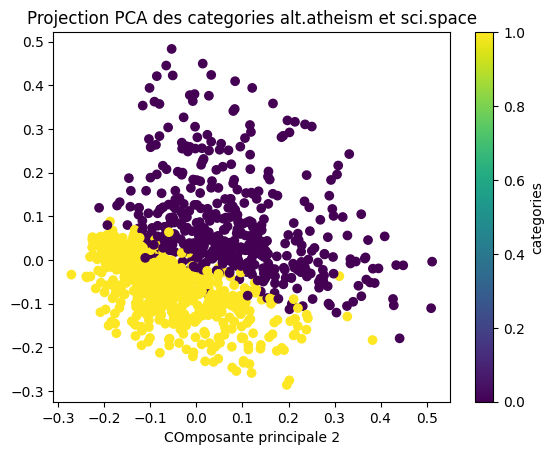

In [218]:
from cProfile import label


newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=['alt.atheism','sci.space'])


""" CountVectorizer() : Convertit le texte brut en un vecteur de fréquence de mots (Bag-of-Words).
TfidfTransformer() : Transforme ces fréquences en scores TF-IDF pour pondérer les termes selon leur importance. """

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

X_visualise = pipeline.fit_transform(newsgroups_train.data).todense()
# CONVERSION EN TABLEAU NUMPY
X_visualise = np.asarray(X_visualise)

pca = PCA(n_components=2).fit(X_visualise)  #La projection dans un espace de 2 dimensions permet de capturer une grande partie de la variance des données tout en simplifiant leur représentation visuelle.
data2D = pca.transform(X_visualise)

plt.scatter(data2D[:,0], data2D[:,1], c=newsgroups_train.target)
plt.xlabel('COmposante principale 1')
plt.xlabel('COmposante principale 2')
plt.title('Projection PCA des categories alt.atheism et sci.space')
plt.colorbar(label='categories')
plt.show()

#### Latent Semantic Analysis (LSA) ou Latent Semantic Indexing (LSI)

- pour réduire la dimensionnalité des données textuelles

In [219]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

1. Truncated SVD (Singular Value Decomposition)

In [220]:
n_components = 5  #5 dimensions principales win y a trop de var
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)

- LSA Avec TfIdf

In [221]:
lsa = make_pipeline(svd, normalizer)  #Combine le SVD et la normalisation en une seule étape grâce à un pipeline.
X = lsa.fit_transform(X)              #X est la matrice réduite où chaque document est représenté dans un espace de 5 dimensions.

- LSA avec BOW

In [222]:
lsa_bow = make_pipeline(svd, normalizer)
X_bow_reduced = lsa_bow.fit_transform(X_bow)

In [223]:
#X_train = lsa.fit_transform(X_train)

#### K_Means

In [224]:
from sklearn.cluster import KMeans, MiniBatchKMeans

- clustering avec les deux choix avec batchs / sans

In [225]:
minibatch = True
if minibatch:
 km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
 init_size=1000, batch_size=1000)
else:
 km = KMeans(n_clusters=3, init='k-means++', max_iter=100,
 n_init=1)
km.fit(X)

MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=4, n_init=1)

- Pour BOW

In [226]:
# Clustering KMeans avec Bag of Words
km_bow = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km_bow.fit(X_bow_reduced)

KMeans(max_iter=100, n_clusters=4, n_init=1)

In [227]:
""" km.cluster_centers_ : contient les centres des clusters 
dans l'espace réduit après la
 décomposition SVD (après réduction de dimensions). """

" km.cluster_centers_ : contient les centres des clusters \ndans l'espace réduit après la\n décomposition SVD (après réduction de dimensions). "

In [228]:
# Récupérer les centres des clusters dans l'espace réduit
original_space_centroids = np.dot(km.cluster_centers_, svd.components_)

# Trier les indices des mots les plus importants pour chaque cluster
order_centroids = original_space_centroids.argsort()[:, ::-1]

# Récupérer les mots associés aux indices
terms = vectorizer.get_feature_names_out()

# Afficher les mots les plus importants pour chaque cluster
for i in range(true_k):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f" {terms[ind]}")

Cluster 0:
 image
 jpeg
 data
 jehovah
 space
 god
 available
 elohim
 lord
 images
Cluster 1:
 jpeg
 image
 gif
 file
 color
 images
 format
 version
 software
 quality
Cluster 2:
 jpeg
 gif
 image
 file
 color
 images
 quality
 format
 version
 bit
Cluster 3:
 jpeg
 graphics
 image
 file
 pub
 gif
 format
 ftp
 images
 mail


In [229]:
# Récupérer les centres des clusters dans l'espace réduit
original_space_centroids = np.dot(km_bow.cluster_centers_, svd.components_)

# Trier les indices des mots les plus importants pour chaque cluster
order_centroids = original_space_centroids.argsort()[:, ::-1]

# Récupérer les mots associés aux indices
terms = vectorizer_bow.get_feature_names_out()

# Afficher les mots les plus importants pour chaque cluster
for i in range(true_k):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f" {terms[ind]}")

Cluster 0:
 god
 space
 jesus
 earth
 people
 jehovah
 graphics
 com
 like
 lord
Cluster 1:
 graphics
 pub
 mail
 space
 ftp
 com
 ray
 send
 128
 3d
Cluster 2:
 space
 earth
 planet
 nasa
 venus
 spacecraft
 solar
 god
 surface
 like
Cluster 3:
 image
 jpeg
 data
 graphics
 file
 images
 available
 space
 ftp
 pub


In [230]:
print(vectorizer.get_feature_names_out()[:20])

['00' '000' '0000' '00000' '000005102000' '000021' '000050' '0000vec'
 '00041032' '0004244402' '0004422' '0005' '0007' '000usd' '0010580b'
 '001102' '001428' '001555' '001718' '00196']


In [231]:
print(km.cluster_centers_)

[[ 0.61274574  0.32286074  0.26887154  0.20080201  0.19018837]
 [ 0.71469755 -0.35128076  0.02724754 -0.42571877  0.29966405]
 [ 0.68558297 -0.55612969 -0.02860601  0.21862991  0.01112404]
 [ 0.84997225  0.19811542 -0.08183615 -0.16026993 -0.24194194]]


#### Visualisation du clustering

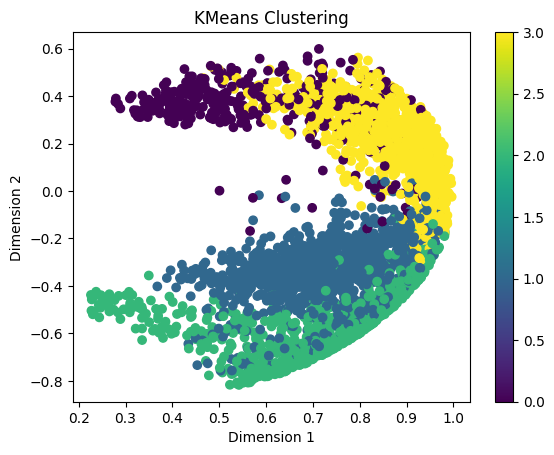

In [232]:
# Utiliser directement la matrice transformée (5 dimensions)
reduced_data = X  # X contient déjà les données réduites à 5 dimensions

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=km.labels_, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar()
plt.show()


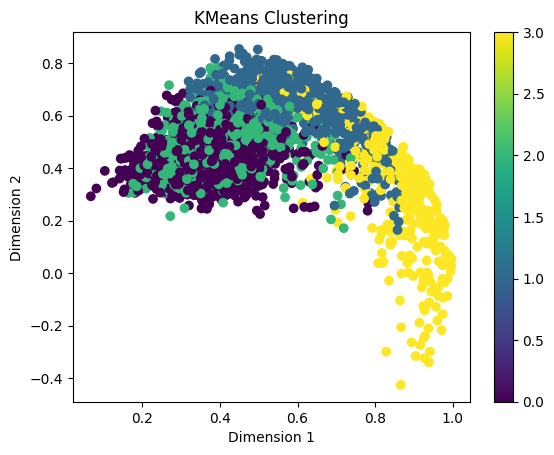

In [233]:
# Utiliser directement la matrice transformée (5 dimensions)
reduced_data_bow = X_bow_reduced # X contient déjà les données réduites à 5 dimensions

plt.scatter(reduced_data_bow[:, 0], reduced_data_bow[:, 1], c=km_bow.labels_, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar()
plt.show()


#### Test du modele K_means sur le dataset Test

In [234]:
# 1. Charger les données de test
dataset_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
X_test = dataset_test.data
y_test = dataset_test.target  # Les étiquettes réelles pour le test

# 2. Vectoriser les données de test avec le même TfidfVectorizer
X_test_vectorized = vectorizer.transform(X_test)

# 3. Réduire la dimensionnalité avec le même SVD
X_test_reduced = lsa.transform(X_test_vectorized)

# 4. Prédire les labels des clusters avec le modèle KMeans entraîné
y_pred = km.predict(X_test_reduced)


In [235]:
# 2. Vectoriser les données de test avec le même TfidfVectorizer
X_test_bow = vectorizer_bow.transform(X_test)

# 3. Réduire la dimensionnalité avec le même SVD
X_test_reduced_bow = lsa_bow.transform(X_test_bow)

# 4. Prédire les labels des clusters avec le modèle KMeans entraîné
y_pred_bow = km_bow.predict(X_test_reduced_bow)


### Matrice de confusion

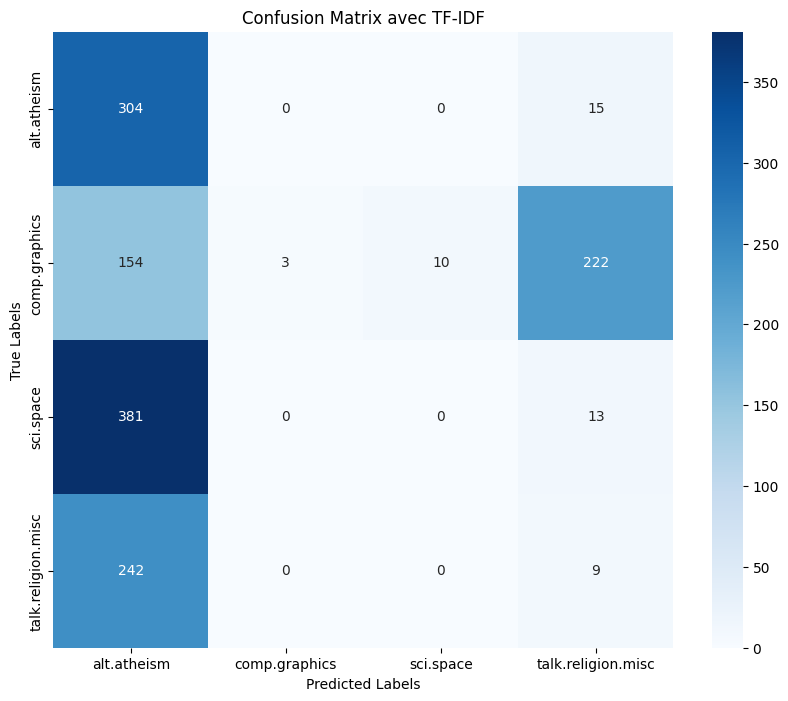

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer une heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset_test.target_names, yticklabels=dataset_test.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix avec TF-IDF')
plt.show()


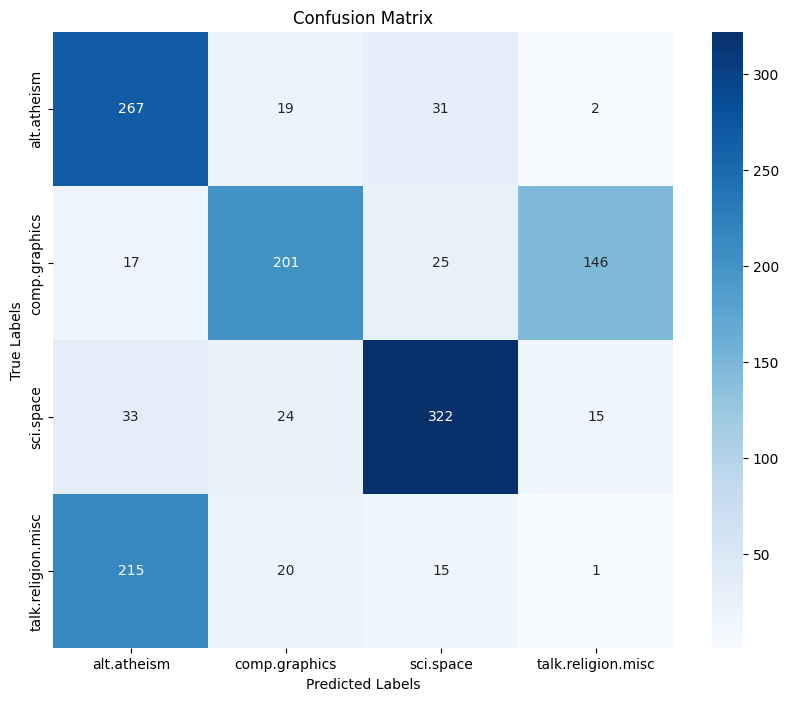

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Calculer la matrice de confusion
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow)

# Créer une heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_bow, annot=True, fmt="d", cmap="Blues", xticklabels=dataset_test.target_names, yticklabels=dataset_test.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Si les clusters sont basés sur des différences plus évidentes dans les fréquences de mots (plutôt que des relations plus subtiles dans la pondération des mots), le modèle BoW pourrait mieux capturer ces différences, d'où des résultats meilleurs en termes de mesure de clustering (ARI et V-Measure).

Le modèle TF-IDF pourrait ne pas fournir une représentation aussi nette dans ce cas si les documents ont des motifs très clairs et dominants en termes de fréquence brute des mots.

1. Adjusted Rand Index (ARI) :
- c'est une bonne métrique pour évaluer à quel point les clusters prédits sont similaires aux vraies classes tout en ajustant le hasard.

In [238]:
# Calcul des scores ARI et V-Measure
ari = adjusted_rand_score(y_test, y_pred)
print(f"Adjusted Rand Index (ARI) pour TF-IDF: {ari}")

ari_bow = adjusted_rand_score(y_test, y_pred_bow)
print(f"Adjusted Rand Index (ARI) pour BoW: {ari_bow}")

Adjusted Rand Index (ARI) pour TF-IDF: 0.09575799545439084
Adjusted Rand Index (ARI) pour BoW: 0.4100552626477805


2. V-Measure :
- La V-Measure est une autre métrique utile pour mesurer la qualité du clustering en termes de cohésion et séparation des clusters.

In [239]:
v_measure = v_measure_score(y_test, y_pred)
print(f"V-Measure pour TF-IDF: {v_measure}")

v_measure_bow = v_measure_score(y_test, y_pred_bow)
print(f"V-Measure pour BoW: {v_measure_bow}")


V-Measure pour TF-IDF: 0.2031443448234103
V-Measure pour BoW: 0.4338559962469162


3. Le Silhouette Score :
- mesure la cohésion et la séparation des clusters, c'est-à-dire la distance moyenne entre les points à l'intérieur du cluster et la distance moyenne entre les points d'autres clusters.

In [240]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_test_reduced, y_pred)
print(f"Silhouette Score avec Tf idf: {sil_score}")


Silhouette Score avec Tf idf: 0.29697035742915373


In [241]:
from sklearn.metrics import silhouette_score
sil_score_bow = silhouette_score(X_test_reduced_bow, y_pred_bow)
print(f"Silhouette Score avec Bow: {sil_score_bow}")


Silhouette Score avec Bow: 0.34088747833806976


#### Le Calinski-Harabasz Index :
    - mesure la variance entre les clusters par rapport à la variance interne des clusters. Un score élevé indique que les clusters sont bien séparés.

In [242]:
from sklearn.metrics import calinski_harabasz_score
calinski_score = calinski_harabasz_score(X_test_reduced, y_pred)
print(f"Calinski-Harabasz Index avec Tf-Idf: {calinski_score}")


Calinski-Harabasz Index avec Tf-Idf: 174.13064871264135


In [243]:
from sklearn.metrics import calinski_harabasz_score
calinski_score_bow = calinski_harabasz_score(X_test_reduced_bow, y_pred_bow)
print(f"Calinski-Harabasz Index avec Bow: {calinski_score_bow}")


Calinski-Harabasz Index avec Bow: 720.3099573031476


##### EXEMPLES  de predictions faites par le modele km

In [244]:
# Affichage des premiers documents avec leurs prédictions
for i in range(5):
    print(f"Document {i}:")
    print(f"True Label: {dataset_test.target_names[y_test[i]]}")
    print(f"Predicted Label: {dataset_test.target_names[y_pred[i]]}")
    print(f"Document Text: {dataset_test.data[i][:300]}...")  # Afficher les 300 premiers caractères du texte
    print("-" * 50)


Document 0:
True Label: sci.space
Predicted Label: alt.atheism
Document Text: From: prb@access.digex.net (Pat)
Subject: Re: Near Miss Asteroids (Q)
Organization: Express Access Online Communications, Greenbelt, MD USA
Lines: 4
Distribution: sci
NNTP-Posting-Host: access.digex.net


TRry the SKywatch project in  Arizona.

pat
...
--------------------------------------------------
Document 1:
True Label: comp.graphics
Predicted Label: talk.religion.misc
Document Text: From: ing1023@ee.up.ac.za (ING1023)
Subject: Vatican library
Organization: Electrical and Computer Engineering, University of Pretoria
Lines: 8
NNTP-Posting-Host: mccartney.ee.up.ac.za



 The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collec...
--------------------------------------------------
Document 2:
True Label: comp.graphics
Predicted Label: talk.religion.misc
Document Text: From: Zheng Wang <zw10+@andrew.cmu.edu>
Subject: help
Organization: Sponsored account

### Hierarchical clustering

In [245]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

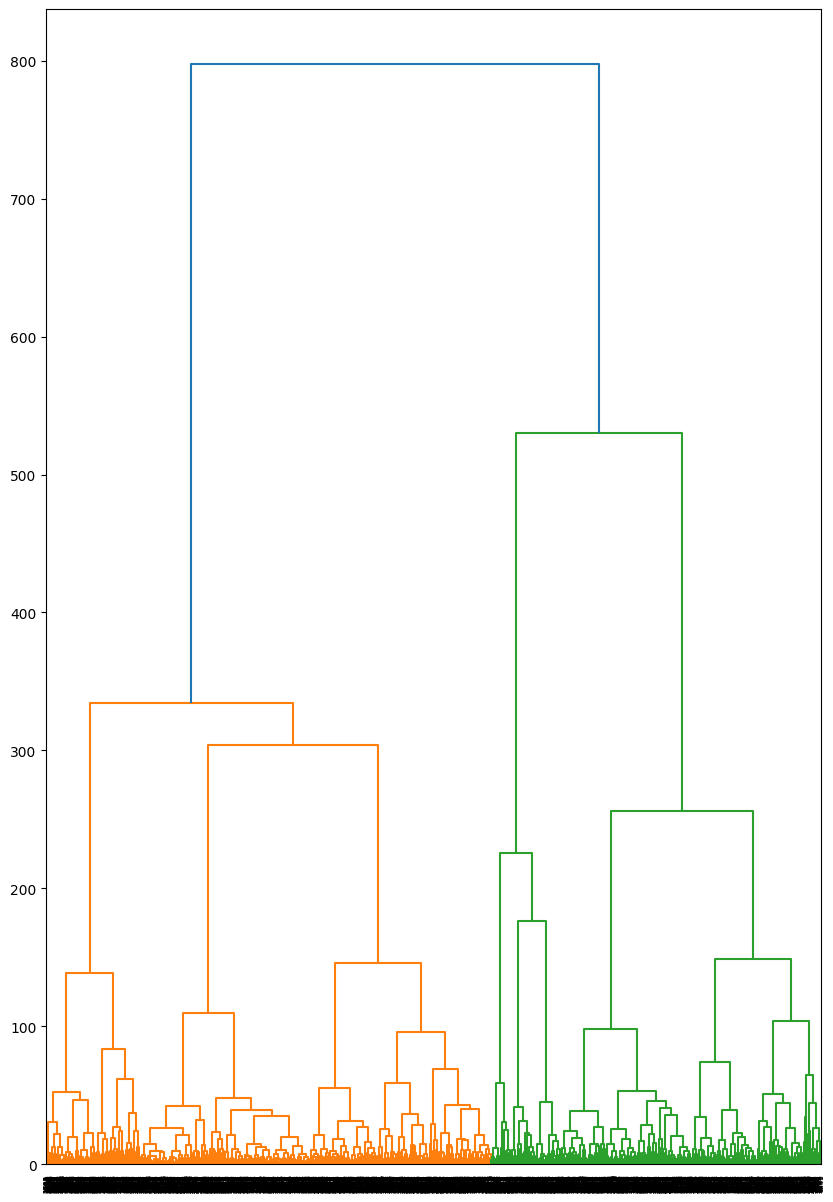

In [246]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

# Apply hierarchical clustering with ward linkage
linkage_matrix = ward(dist)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 15))  # Set figure size
ax = dendrogram(linkage_matrix, orientation="top")
plt.show()


In [247]:
from gensim.models import Doc2Vec
from sklearn.cluster import KMeans
from gensim.models.doc2vec import TaggedDocument

# Entraîner un modèle Doc2Vec
documents = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(dataset.data)]
model = Doc2Vec(documents, vector_size=100, window=5, min_count=2, workers=4)

# Extraire les vecteurs de documents
doc2vec_features = [model.infer_vector(sentence.split()) for sentence in dataset.data]

# Appliquer KMeans sur les vecteurs
km = KMeans(n_clusters=true_k)
km.fit(doc2vec_features)


KMeans(n_clusters=4)

In [248]:
# 6. Calculer le silhouette score
silhouette_avg = silhouette_score(doc2vec_features, km.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# 7. Calculer le V-Measure
v_measure = v_measure_score(labels, km.labels_)
print(f"V-Measure: {v_measure}")

# 8. Calculer l'Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, km.labels_)
print(f"Adjusted Rand Index (ARI): {ari}")

Silhouette Score: 0.4230688512325287
V-Measure: 0.11240850353691141
Adjusted Rand Index (ARI): 0.03908475926869028


## Classification avec NaiveBayes

In [249]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# order of labels in `target_names` can be different from `categories`
data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42)

target_names = dataset.target_names

# split a training set and a test set
y_train, y_test = dataset.target, data_test.target

# Réduction de dimensionnalité pour les données d'entraînement
X_train_reduced = lsa.fit_transform(X)  # Transformation SVD pour les données d'entraînement
X_train_reduced_bow = lsa_bow.fit_transform(X_bow)  # Transformation SVD pour les données BoW d'entraînement

# Appliquer la réduction de dimensionnalité sur les données de test
X_test_reduced = lsa.transform(X_test_vectorized)  # Transformation SVD pour les données de test TF-IDF
X_test_reduced_bow = lsa_bow.transform(X_test_bow)  # Transformation SVD pour les données de test BoW

# Naive Bayes - TF-IDF
gnb = GaussianNB()
gnb.fit(X_train_reduced, y_train)  # Entraînement sur les données réduites
y_pred_NB = gnb.predict(X_test_reduced)  # Prédiction sur les données de test

# Naive Bayes - BoW
gnb_bow = GaussianNB()
gnb_bow.fit(X_train_reduced_bow, y_train)  # Entraînement sur les données réduites BoW
y_pred_NB_bow = gnb_bow.predict(X_test_reduced_bow)  # Prédiction sur les données de test BoW

# Support Vector Machine - TF-IDF
svm = SVC()
svm.fit(X_train_reduced, y_train)  # Entraînement sur les données réduites
y_pred_SVM = svm.predict(X_test_reduced)  # Prédiction sur les données de test

# Support Vector Machine - BoW
svm_bow = SVC()
svm_bow.fit(X_train_reduced_bow, y_train)  # Entraînement sur les données réduites BoW
y_pred_SVM_bow = svm_bow.predict(X_test_reduced_bow)  # Prédiction sur les données de test BoW

# Évaluer les performances
print(f"Accuracy Naive Bayes (TF-IDF): {accuracy_score(y_test, y_pred_NB)}")
print(f"Accuracy Naive Bayes (BoW): {accuracy_score(y_test, y_pred_NB_bow)}")
print(f"Accuracy SVM (TF-IDF): {accuracy_score(y_test, y_pred_SVM)}")
print(f"Accuracy SVM (BoW): {accuracy_score(y_test, y_pred_SVM_bow)}")


Accuracy Naive Bayes (TF-IDF): 0.16925351071692535
Accuracy Naive Bayes (BoW): 0.7073170731707317
Accuracy SVM (TF-IDF): 0.1729490022172949
Accuracy SVM (BoW): 0.729490022172949


## Testing New Text

In [250]:
# Exemple de nouveaux textes
new_text = ["Space exploration is vital for humanity.", "images are important in tech."]

# Vectorisation avec TF-IDF
new_text_vectorized = vectorizer.transform(new_text)

# Réduction dimensionnelle avec SVD
new_text_reduced = lsa.transform(new_text_vectorized)

# Prédiction avec Naïve Bayes (BoW)
predicted_labels = gnb_bow.predict(new_text_reduced)

# Affichage des résultats
print("Prédictions des catégories :")
for text, label in zip(new_text, predicted_labels):
    print(f"Texte: {text}")
    print(f"Catégorie prédite: {dataset.target_names[label]}")
    print("-" * 50)


Prédictions des catégories :
Texte: Space exploration is vital for humanity.
Catégorie prédite: sci.space
--------------------------------------------------
Texte: images are important in tech.
Catégorie prédite: comp.graphics
--------------------------------------------------


Le nouveau document appartient au cluster : 2
Mots dominants du cluster 2:
  space
  earth
  planet
  nasa
  venus
  spacecraft
  solar
  god
  surface
  like


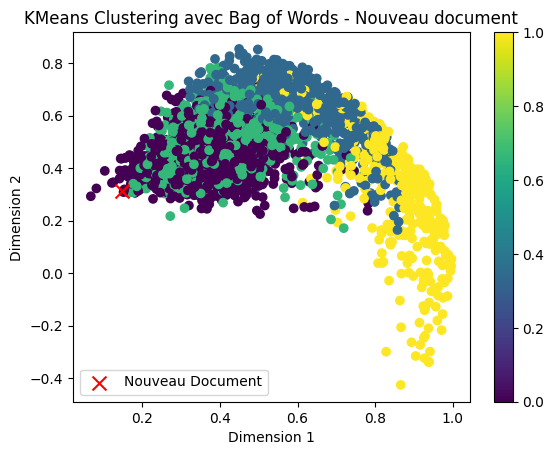

In [251]:
# 1. Vectorisation du nouveau document avec le même vectoriseur BoW
new_document = ["Space exploration is crucial for humanity."]  # Exemple de nouveau texte
new_doc_bow = vectorizer_bow.transform(new_document)  # Vectorisation avec le même BoW

# 2. Réduction de dimensionnalité (SVD) pour ce nouveau document
new_doc_bow_reduced = lsa_bow.transform(new_doc_bow)  # Réduction avec le même modèle LSA utilisé lors de l'entraînement

# 3. Prédiction du cluster avec KMeans
predicted_cluster = km_bow.predict(new_doc_bow_reduced)  # Attribuer ce document au cluster le plus proche
print(f"Le nouveau document appartient au cluster : {predicted_cluster[0]}")

# 4. Affichage des mots dominants du cluster attribué
print(f"Mots dominants du cluster {predicted_cluster[0]}:")
for ind in order_centroids[predicted_cluster[0], :10]:  # Afficher les 10 premiers mots dominants
    print(f"  {terms[ind]}")

# 5. Optionnel : visualisation de la position du document dans l'espace réduit
plt.scatter(reduced_data_bow[:, 0], reduced_data_bow[:, 1], c=km_bow.labels_, cmap='viridis')
plt.scatter(new_doc_bow_reduced[:, 0], new_doc_bow_reduced[:, 1], color='red', marker='x', s=100, label="Nouveau Document")
plt.title("KMeans Clustering avec Bag of Words - Nouveau document")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar()
plt.legend()
plt.show()
